# Final Code
+ [MAB from Scratch Code](https://www.kaggle.com/code/cstorm3000/multi-armed-bandits-from-scratch)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class MultiArmedBandit:
  def __init__(self, n_arms, epsilon):
    self.n_arms = n_arms
    self.epsilon = epsilon
    self.true_rewards = np.random.rand(n_arms) # True Rewards
    self.q_values = np.zeros(n_arms) # Estimated Q Value by arm
    self.n_pulls = np.zeros(n_arms) # Number of times each arm has been pulled
    self.total_rewards = []

  def simulate_user_engagement(self, item_conversion_rate):
    return np.random.rand() < item_conversion_rate # based on item conversion rate

  def epsilon_greedy(self, num_iterations):
    for _ in range(num_iterations):
        if np.random.rand() < self.epsilon: # Exploration
          selected_item = np.random.choice(self.n_arms)
        else: # Exploitation
          selected_item = np.argmax(self.q_values) # Higest estimated valued arm

        # Update the rewards
        reward = self.simulate_user_engagement(self.true_rewards[selected_item])
        self.total_rewards.append(reward)

        # Update counts and estimates
        self.n_pulls[selected_item] += 1
        self.q_values[selected_item] += (reward - self.q_values[selected_item]) / self.n_pulls[selected_item]

  def random_selection(self, num_iterations): # Random selection strategy to compare
    random_rewards = []
    for _ in range(num_iterations):
      selected_item = np.random.choice(self.n_arms)
      reward = self.simulate_user_engagement(self.true_rewards[selected_item])
      random_rewards.append(reward)
    return random_rewards

  def plot_rewards(self, random_rewards): # Plots of cumulativ rewards
    cumulative_mab_rewards = np.cumsum(self.total_rewards)
    cumulative_random_rewards = np.cumsum(random_rewards)

    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_mab_rewards, label='Epsilon-Greedy', color='red')
    plt.plot(cumulative_random_rewards, label='Random Selection', color='blue')
    plt.title('Cumulative Rewards Over Time')
    plt.xlabel('Iterations')
    plt.ylabel('Cumulative Rewards')
    plt.legend()
    plt.grid()
    plt.show()

  def get_estimated_conversion_rates(self):
    return self.q_values, self.n_pulls


In [11]:
n_arms = 10
n_events = 1000 # Iterations
epsilon = 0.1 # Exploration Prob

mab = MultiArmedBandit(n_arms, epsilon)

mab.epsilon_greedy(n_events) # Epsilon Greedy Part

random_rewards = mab.random_selection(n_events) # Random Selection Part

print("\nRandom Rewards:")
print(random_rewards)


Random Rewards:
[False, False, True, False, False, False, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, False, True, False, False, True, True, True, True, False, False, True, False, False, False, True, False, True, False, False, False, False, True, False, True, False, False, False, False, True, True, True, True, True, False, True, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, True, False, True, True, False, False, False, False, True, True, True, True, True, True, False, False, False, True, True, False, False, False, False, True, True, True, False, True, True, True, False, True, True, False, False, False, False, False, True, False, True, False, True, True, True, False, False, False, True, False, True, False, False, True, True, True, False, False, True, True, False, True, False, False, False, True, True, True, True, False, True, True, True, True, True, True, False, False, True

In [12]:
estimated_conversion_rates, selections = mab.get_estimated_conversion_rates()

print("\nEstimated Conversion Rates:")
for i, (rate, count) in enumerate(zip(estimated_conversion_rates, selections)):
    print(f"Item {i + 1}: Estimated Rate = {rate:.2f}, Selections = {count}")


Estimated Conversion Rates:
Item 1: Estimated Rate = 0.56, Selections = 61.0
Item 2: Estimated Rate = 0.46, Selections = 13.0
Item 3: Estimated Rate = 0.89, Selections = 27.0
Item 4: Estimated Rate = 0.20, Selections = 15.0
Item 5: Estimated Rate = 0.25, Selections = 12.0
Item 6: Estimated Rate = 0.29, Selections = 7.0
Item 7: Estimated Rate = 0.94, Selections = 826.0
Item 8: Estimated Rate = 0.07, Selections = 15.0
Item 9: Estimated Rate = 0.54, Selections = 13.0
Item 10: Estimated Rate = 0.09, Selections = 11.0


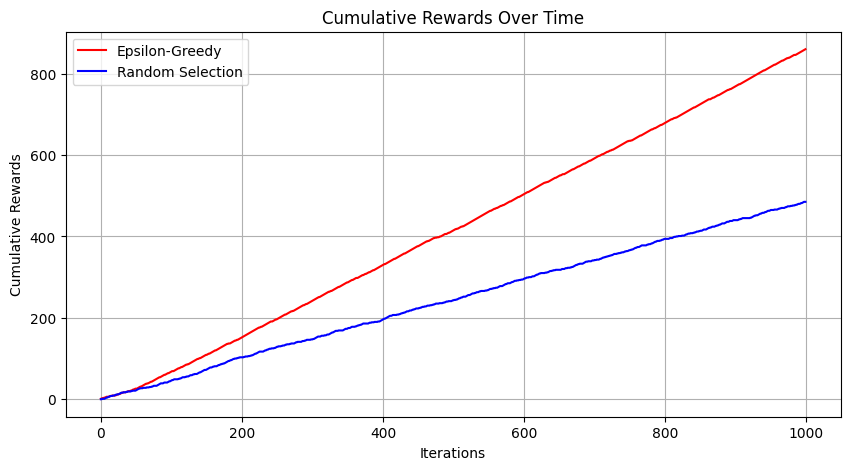

In [13]:
mab.plot_rewards(random_rewards)
# Plot looks straight because of normal data generated